<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.209032,29.469038,24.792376,-0.005776,154.464670,154.506445,-0.041775
1,0.0,1.0,95.182929,91.441961,90.514137,0.002209,287.141237,287.128065,0.013172
2,0.0,2.0,42.767860,58.377914,28.139647,0.010651,139.296071,139.288906,0.007165
3,0.0,3.0,87.954052,54.189062,93.178098,-0.051544,245.269668,245.315826,-0.046158
4,0.0,4.0,32.851740,61.573812,66.925648,-0.028058,171.323142,171.330065,-0.006923
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.559909,60.224389,41.369734,-0.044536,145.109496,145.136057,-0.026561
29996,999.0,26.0,54.090377,43.665621,96.432830,0.017525,204.206352,204.212734,-0.006382
29997,999.0,27.0,75.830293,74.765041,59.476288,-0.027468,220.044153,220.054246,-0.010094
29998,999.0,28.0,24.855171,59.796667,55.485549,-0.032558,150.104830,150.124807,-0.019978


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    90.209032  29.469038  24.792376 -0.005776  154.464670   
      1.0    95.182929  91.441961  90.514137  0.002209  287.141237   
      2.0    42.767860  58.377914  28.139647  0.010651  139.296071   
      3.0    87.954052  54.189062  93.178098 -0.051544  245.269668   
      4.0    32.851740  61.573812  66.925648 -0.028058  171.323142   
...                ...        ...        ...       ...         ...   
999.0 25.0   33.559909  60.224389  41.369734 -0.044536  145.109496   
      26.0   54.090377  43.665621  96.432830  0.017525  204.206352   
      27.0   75.830293  74.765041  59.476288 -0.027468  220.044153   
      28.0   24.855171  59.796667  55.485549 -0.032558  150.104830   
      29.0   42.030646  47.662038  60.490646 -0.021138  160.162191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    154.506445 -0.041775  
      1.0    287.128065  0.013172  
      2.0    139.288906  0.007165  
      3.0    245.315826 -0.046158  
      4.0    171.330065 -0.006923  
...                 ...       ...  
999.0 25.0   145.136057 -0.026561  
      26.0   204.212734 -0.006382  
      27.0   220.054246 -0.010094  
      28.0   150.124807 -0.019978  
      29.0   160.186219 -0.024028  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    90.209032  29.469038  24.792376 -0.005776  154.464670   
      1.0    95.182929  91.441961  90.514137  0.002209  287.141237   
      2.0    42.767860  58.377914  28.139647  0.010651  139.296071   
      3.0    87.954052  54.189062  93.178098 -0.051544  245.269668   
      4.0    32.851740  61.573812  66.925648 -0.028058  171.323142   
...                ...        ...        ...       ...         ...   
999.0 25.0   33.559909  60.224389  41.369734 -0.044536  145.109496   
      26.0   54.090377  43.665621  96.432830  0.017525  204.206352   
      27.0   75.830293  74.765041  59.476288 -0.027468  220.044153   
      28.0   24.855171  59.796667  55.485549 -0.032558  150.104830   
      29.0   42.030646  47.662038  60.490646 -0.021138  160.162191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    154.506445 -0.041775  
      1.0    287.128065  0.013172  
      2.0    139.288906  0.007165  
      3.0    245.315826 -0.046158  
      4.0    171.330065 -0.006923  
...                 ...       ...  
999.0 25.0   145.136057 -0.026561  
      26.0   204.212734 -0.006382  
      27.0   220.054246 -0.010094  
      28.0   150.124807 -0.019978  
      29.0   160.186219 -0.024028  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,90.209032,29.469038,24.792376,-0.005776,154.464670,154.506445,-0.041775
1,0.0,1.0,95.182929,91.441961,90.514137,0.002209,287.141237,287.128065,0.013172
2,0.0,2.0,42.767860,58.377914,28.139647,0.010651,139.296071,139.288906,0.007165
3,0.0,3.0,87.954052,54.189062,93.178098,-0.051544,245.269668,245.315826,-0.046158
4,0.0,4.0,32.851740,61.573812,66.925648,-0.028058,171.323142,171.330065,-0.006923
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,33.559909,60.224389,41.369734,-0.044536,145.109496,145.136057,-0.026561
29996,999.0,26.0,54.090377,43.665621,96.432830,0.017525,204.206352,204.212734,-0.006382
29997,999.0,27.0,75.830293,74.765041,59.476288,-0.027468,220.044153,220.054246,-0.010094
29998,999.0,28.0,24.855171,59.796667,55.485549,-0.032558,150.104830,150.124807,-0.019978


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    90.209032  29.469038  24.792376 -0.005776  154.464670   
      1.0    95.182929  91.441961  90.514137  0.002209  287.141237   
      2.0    42.767860  58.377914  28.139647  0.010651  139.296071   
      3.0    87.954052  54.189062  93.178098 -0.051544  245.269668   
      4.0    32.851740  61.573812  66.925648 -0.028058  171.323142   
...                ...        ...        ...       ...         ...   
999.0 25.0   33.559909  60.224389  41.369734 -0.044536  145.109496   
      26.0   54.090377  43.665621  96.432830  0.017525  204.206352   
      27.0   75.830293  74.765041  59.476288 -0.027468  220.044153   
      28.0   24.855171  59.796667  55.485549 -0.032558  150.104830   
      29.0   42.030646  47.662038  60.490646 -0.021138  160.162191   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    154.506445 -0.041775  
      1.0    287.128065  0.013172  
      2.0    139.288906  0.007165  
      3.0    245.315826 -0.046158  
      4.0    171.330065 -0.006923  
...                 ...       ...  
999.0 25.0   145.136057 -0.026561  
      26.0   204.212734 -0.006382  
      27.0   220.054246 -0.010094  
      28.0   150.124807 -0.019978  
      29.0   160.186219 -0.024028  

[30000 rows x 7 columns]

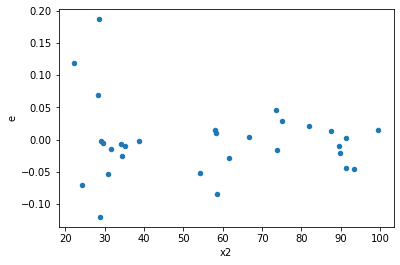

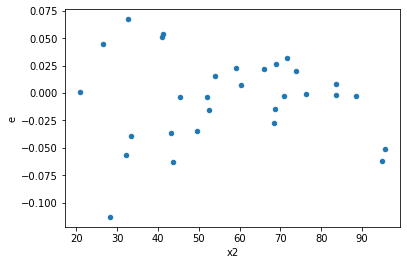

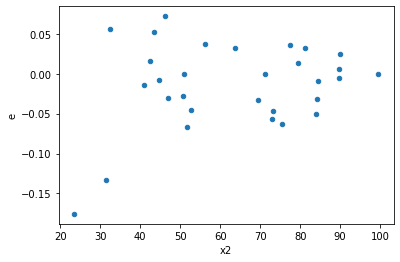

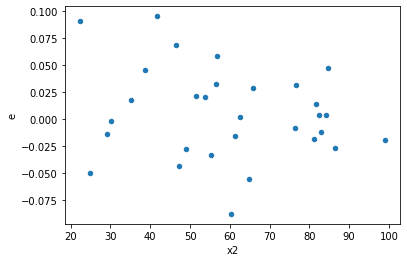

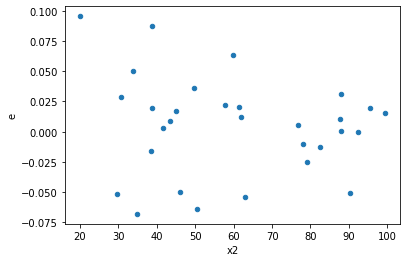

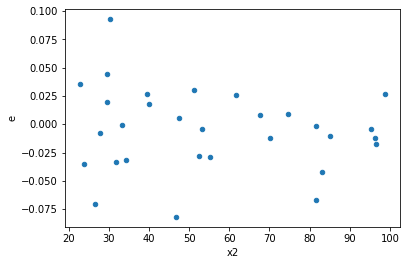

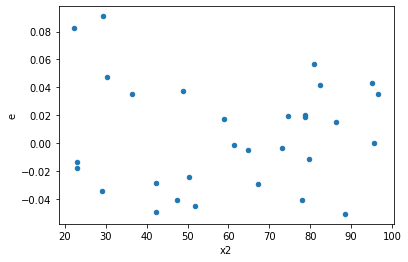

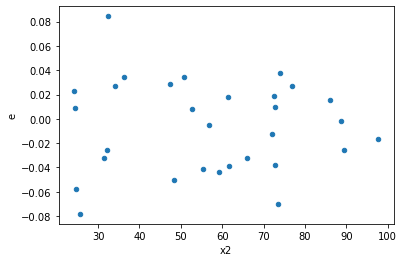

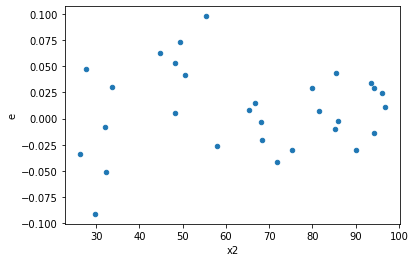

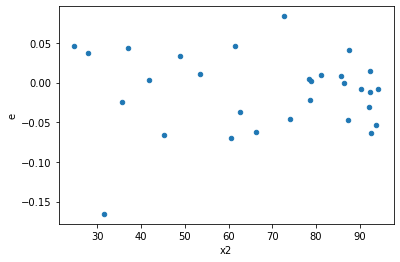

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,13.0,11.0,0.030937247718881067,0.03839972204906193,0.0023797882860677744,0.0034908838226419938,1.466888396366607,0.5312376179600853,0.7343811910199574,0.26561880898004264,Reject001=1 : Homoscedasticity
2.0,15.0,9.0,0.023679924193065683,0.04162383471871474,0.0015786616128710454,0.004624870524301637,2.929614862738431,0.10779532513130952,0.9461023374343452,0.05389766256565476,Reject001=1 : Homoscedasticity
4.0,11.0,13.0,0.007904050531911082,0.026530712465143866,0.0007185500483555529,0.0020408240357802972,2.840197478868524,0.07709720051259805,0.961451399743701,0.038548600256299026,Reject001=1 : Homoscedasticity
5.0,9.0,15.0,0.0031119148894581177,0.023606267434226478,0.000345768321050902,0.0015737511622817653,4.551461387493873,0.009844965874696632,0.9950775170626517,0.004922482937348316,Reject001=0 : Heteroscedasticity
6.0,16.0,8.0,0.023487712737325937,0.012690322745448589,0.001467982046082871,0.0015862903431810736,1.080592468698029,0.9565777207400732,0.5217111396299634,0.4782888603700366,Reject001=1 : Homoscedasticity
7.0,17.0,7.0,0.023201398837912734,0.010875497044327968,0.0013647881669360431,0.0015536424349039955,1.1383762495478922,0.9136793784913011,0.5431603107543495,0.45683968924565055,Reject001=1 : Homoscedasticity
8.0,16.0,8.0,0.02266756163689932,0.014389955019480193,0.0014167226023062075,0.0017987443774350241,1.269651782576874,0.7586416299801018,0.6206791850099491,0.3793208149900509,Reject001=1 : Homoscedasticity
9.0,11.0,13.0,0.017368009025410944,0.03282162204879263,0.001578909911400995,0.002524740157599433,1.5990400334868924,0.41718428824865317,0.7914078558756734,0.20859214412432658,Reject001=1 : Homoscedasticity
10.0,5.0,19.0,0.007764342991853511,0.039487171372411214,0.0015528685983707022,0.002078272177495327,1.3383438751198187,0.581694879857344,0.709152560071328,0.290847439928672,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,11.0,0.030937247718881067,0.03839972204906193,0.0023797882860677744,0.0034908838226419938,1.466888396366607,0.5312376179600853,Reject001=1 : Homoscedasticity
1.0,17.0,7.0,0.031555426725353865,0.004109882431879771,0.0018562015720796391,0.0005871260616971102,0.31630512037510544,0.04963337894027259,Reject001=1 : Homoscedasticity
2.0,15.0,9.0,0.023679924193065683,0.04162383471871474,0.0015786616128710454,0.004624870524301637,2.929614862738431,0.10779532513130952,Reject001=1 : Homoscedasticity
3.0,15.0,9.0,0.03129970523679361,0.011117542229609131,0.0020866470157862404,0.00123528246995657,0.5919939791499045,0.3549353010316661,Reject001=1 : Homoscedasticity
4.0,11.0,13.0,0.007904050531911082,0.026530712465143866,0.0007185500483555529,0.0020408240357802972,2.840197478868524,0.07709720051259805,Reject001=1 : Homoscedasticity
5.0,9.0,15.0,0.0031119148894581177,0.023606267434226478,0.000345768321050902,0.0015737511622817653,4.551461387493873,0.009844965874696632,Reject001=0 : Heteroscedasticity
6.0,16.0,8.0,0.023487712737325937,0.012690322745448589,0.001467982046082871,0.0015862903431810736,1.080592468698029,0.9565777207400732,Reject001=1 : Homoscedasticity
7.0,17.0,7.0,0.023201398837912734,0.010875497044327968,0.0013647881669360431,0.0015536424349039955,1.1383762495478922,0.9136793784913011,Reject001=1 : Homoscedasticity
8.0,16.0,8.0,0.02266756163689932,0.014389955019480193,0.0014167226023062075,0.0017987443774350241,1.269651782576874,0.7586416299801018,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      860
Reject001=0 : Heteroscedasticity    140
Name: Result_test, dtype: int64